In [ ]:
# from tensorflow.keras.preprocessing import image_dataset_from_directory

# path = "./Train"'
# train = image_dataset_from_directory(path, batch_size=32,
#                                     image_size=(256,256),shuffle=True)


Found 1322 files belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the main directory containing the 'train' and 'test' folders
main_directory = "."

# Specify the training dataset directory
train_directory = main_directory + "/Train"
val_directory = main_directory + "/Validation"

# Define image dimensions and batch size
image_size = (256, 256)
batch_size = 32

# Create training dataset using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

# Create validation dataset usw



Found 1322 files belonging to 3 classes.
Using 1058 files for training.
Found 150 files belonging to 3 classes.
Using 30 files for validation.


In [7]:
# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Adjust the output units based on the number of classes
])



In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the model
##uncomment to train 
# history = model.fit(
#     train_dataset,
#     epochs=10,  # Adjust the number of epochs based on your needs
#     validation_data=val_dataset
# )


Epoch 1/10
34/34 [==============================] - 163s 4s/step - loss: 106.0164 - accuracy: 0.4546 - val_loss: 1.2314 - val_accuracy: 0.3667
Epoch 2/10
34/34 [==============================] - 153s 4s/step - loss: 0.7521 - accuracy: 0.6569 - val_loss: 0.8308 - val_accuracy: 0.6333
Epoch 3/10
34/34 [==============================] - 157s 4s/step - loss: 0.4972 - accuracy: 0.8251 - val_loss: 0.3790 - val_accuracy: 0.9000
Epoch 4/10
34/34 [==============================] - 150s 4s/step - loss: 0.2086 - accuracy: 0.9216 - val_loss: 0.3829 - val_accuracy: 0.9000
Epoch 5/10
34/34 [==============================] - 148s 4s/step - loss: 0.1572 - accuracy: 0.9565 - val_loss: 0.5399 - val_accuracy: 0.9333
Epoch 6/10
34/34 [==============================] - 166s 5s/step - loss: 0.0966 - accuracy: 0.9698 - val_loss: 0.5190 - val_accuracy: 0.8667
Epoch 7/10
34/34 [==============================] - 163s 4s/step - loss: 0.1214 - accuracy: 0.9698 - val_loss: 0.5272 - val_accuracy: 0.9000
Epoch 8/10


In [12]:
# Save the trained model if needed
# model.save("./model.h5")
# model.save("./model.keras")


In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
# Load the pre-trained model (replace with your model path)
model = tf.keras.models.load_model("./model.keras")

In [36]:
# Define the path to the new image you want to classify
new_image_path = "./Test/Healthy/8ddaa5a5caa5caa8.jpg"
# new_image_path = "./Test/Rust/82add70df6ab2854.jpg"
new_image_path = "./Test/Powdery/84e59b911be64c6e.jpg"

In [37]:
# Load and preprocess the new image
img = image.load_img(new_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [38]:
class_name = {0:"Rust",1:"Powdery",2:"Healthy"}

In [39]:
# Make predictions
predictions = model.predict(img_array)
# Decode the predictions (assuming your model is trained for categorical classification)
predicted_class = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 72ms/step


In [40]:
# Print the predicted class
print("Predicted Class:", class_name.get(predicted_class[0]))

Predicted Class: Healthy


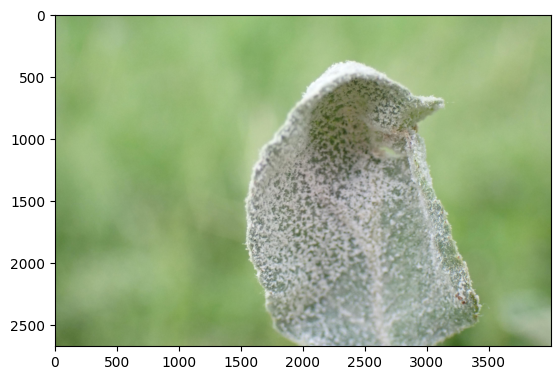

In [41]:
# Display the new image
img = image.load_img(new_image_path)
plt.imshow(img)
plt.show()